### SGDRegressor

+ A biblioteca Scikit-Learn disponibiliza a classe `SGDRegressor` para realizar regressão linear utilizando o Gradiente Descendente Estocástico.
+ A classe possui vários parâmetros que podem ser configurados (e.g., tipo de função de erro, esquema de variação do passo de aprendizagem, etc.).
+ Após instanciarmos um objeto dessa classe, o treinamento é feito com o método `fit` e a predição é feita com o método `predict`.
+ Além da versão estocástica, podemos implementar a versão em mini-batches com a classe `SGDRegressor` usando o método `partial_fit`.
+ Os pesos são acessados através dos atributos `intercept_` e `coef_` do objeto da classe `SGDRegressor`.
+ Porém, não conseguimos implementar a versão em batelada.
+ Para mais informações sobre a classe `SGDRegressor`, acesse sua documentação: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

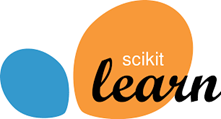

In [63]:
import numpy as np
import random
import matplotlib.pyplot as plt
# Usamos a classe SGDRegressor do módulo Linear da biblioteca sklearn.
from sklearn.linear_model import SGDRegressor

In [64]:
# Reseta gerador de sequências pseudo-aleatórias.
random.seed(42)

In [65]:
# Número de exemplos
N = 1000

# Atributos.
x = np.random.rand(N, 1)

# Ruído.
w = 0.5*np.random.randn(N, 1)

# Modelo gerador.
y = 1.2 + 3*x

# Função observável.
y_noisy = y + w

# Concatena os vetores.
X = np.c_[np.ones((N,1)), x]

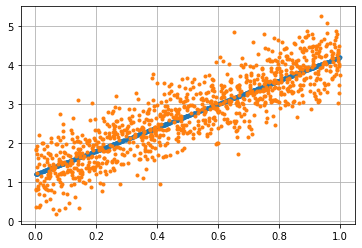

In [66]:
plt.figure()
plt.plot(x, y,'.')
plt.plot(x, y_noisy,'.')
plt.grid()
plt.show()

In [71]:
# Instancia a classe SGDRegressor.
# 'fit_intercept=False': como modelo gerador não tem peso a0 (intercept), não precisamos encontrá-lo.
sgd_reg = SGDRegressor(warm_start=True, fit_intercept=True, shuffle=False, penalty=None)

# Number of epochs.
n_epochs = 10000

# Mini-batch size.
mb_size = 100

# Mini-batch gradient-descent loop.
inc = 0
for e in range(n_epochs):

    # Shuffle the whole dataset before every epoch.
    shuffled_data_set_indexes = random.sample(range(0, N), N)

    for i in range(0, N//mb_size):

        start = i*mb_size
        end = mb_size*(i+1)
        batch_indexes = shuffled_data_set_indexes[start:end]

        xi = X[batch_indexes]
        yi = y_noisy[batch_indexes]

        # Treina o modelo.
        sgd_reg.partial_fit(xi, yi.ravel())

# Imprime o número de iterações até que o algoritmo pare de treinar.
print('Number of iterations:', sgd_reg.n_iter_)

Number of iterations: 1


In [72]:
# Faz previsão com o modelo treinado.
y_pred = sgd_reg.predict(X)

Jgde = (1.0/N)*np.sum(np.square(y_noisy - y_pred.reshape(N,1)))
print('Jgde:', Jgde)

Jgde: 0.23740995551584937


In [73]:
# Imprime valores encontrados pelo GDE.
print('a0: %1.4f' % (sgd_reg.coef_[0]))
print('a1: %1.4f' % (sgd_reg.coef_[1]))

a0: 0.5967
a1: 3.0350


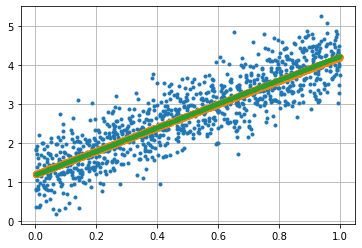

In [74]:
plt.figure()
plt.plot(x, y_noisy,'.')
plt.plot(x, y,'o')
plt.plot(x, y_pred,'.')
plt.grid()
plt.show()